In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Data Loading

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data Preprocessing

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The following columns have an invalid zero value which indicate missing values
Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [7]:
# Replace zero values with NaN in specific columns where zero is not a valid measurement
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values in the specified columns with NaN
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

In [8]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [9]:
# Now handle missing values: Fill NaN values with the mean of the respective column
df[columns_to_replace] = df[columns_to_replace].fillna(df[columns_to_replace].mean())

In [10]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [11]:
# Check for duplicate entries
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(768, 9)

## Exploratory Data Analysis (EDA)

In [13]:
# Check the distribution of target variable 'Outcome' (Diabetes)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

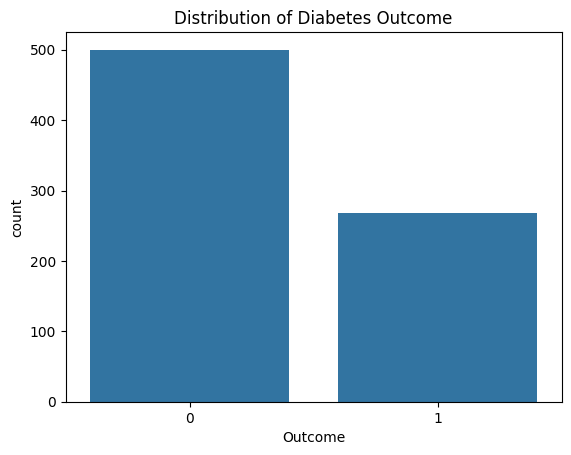

In [14]:
# Visualize the distribution of the 'Outcome' column
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

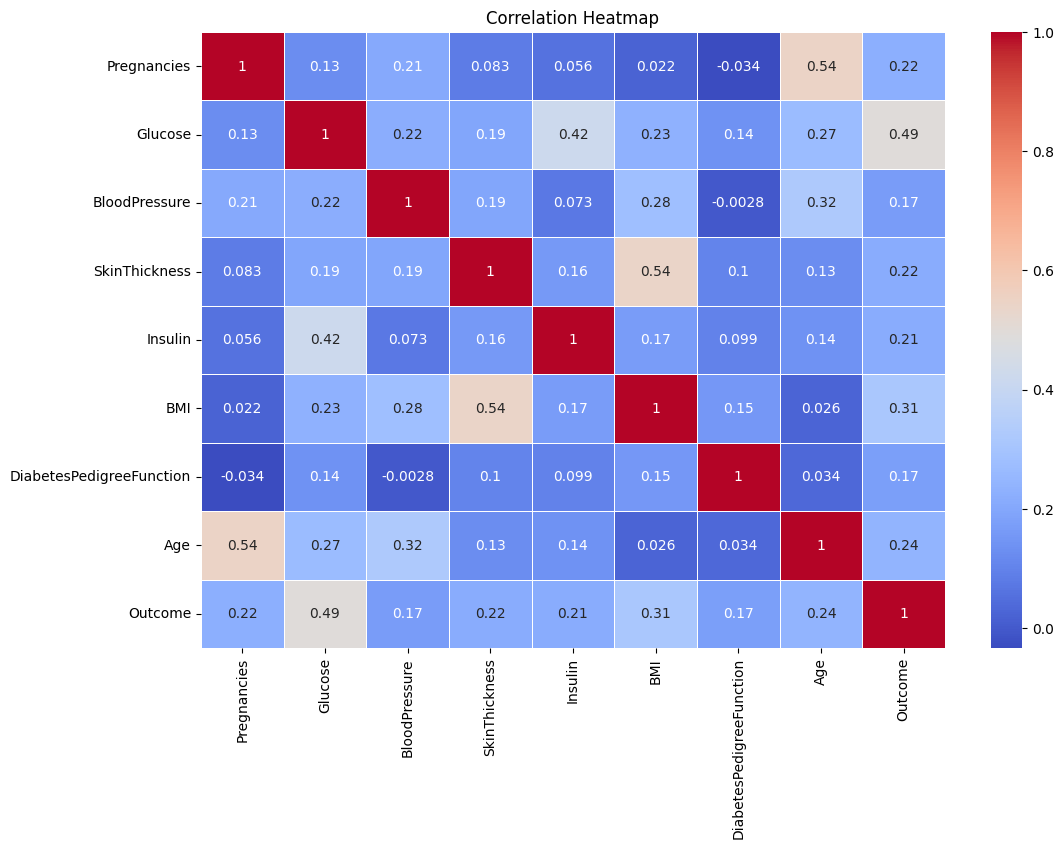

In [15]:
# Visualize correlations between features using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

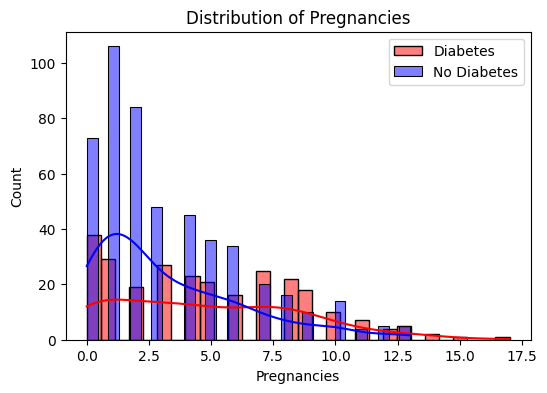

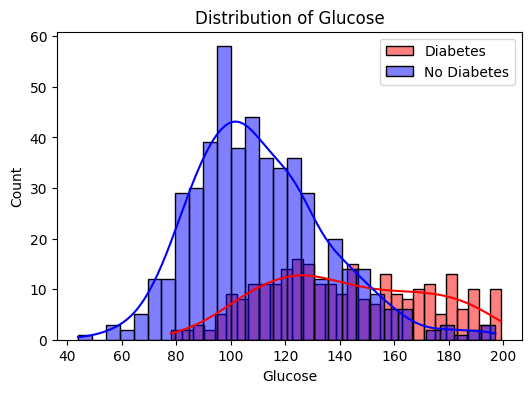

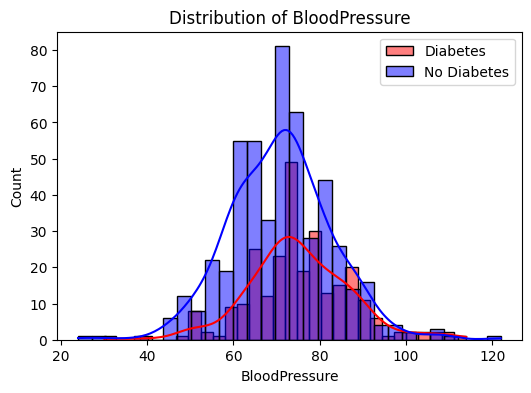

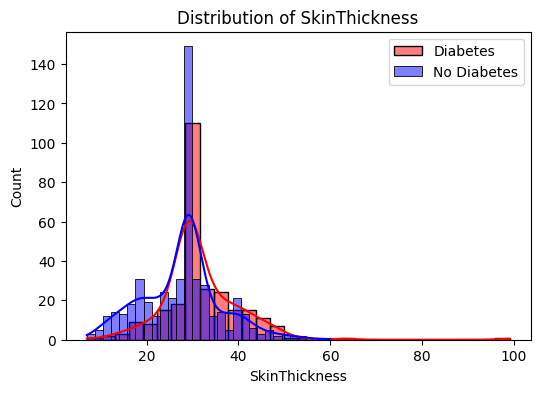

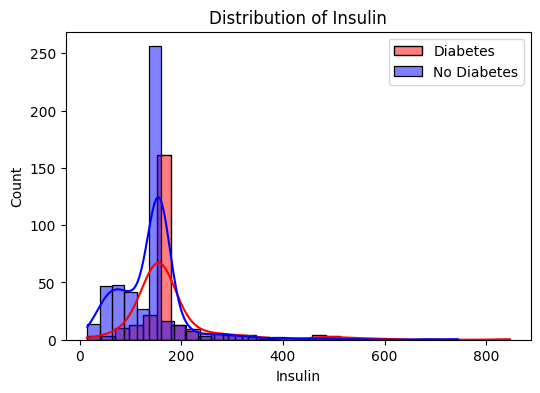

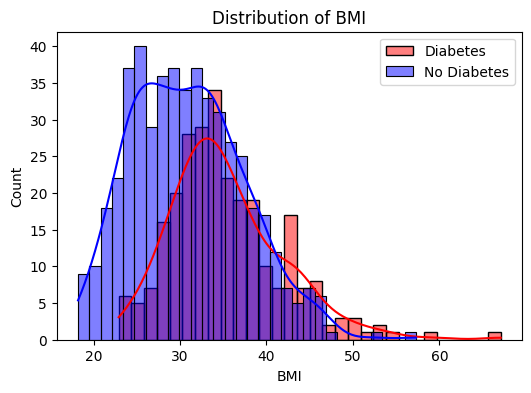

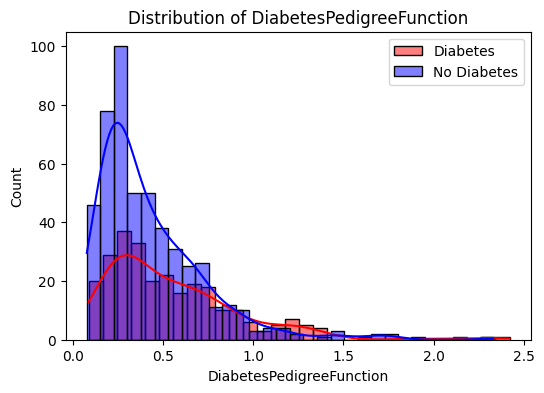

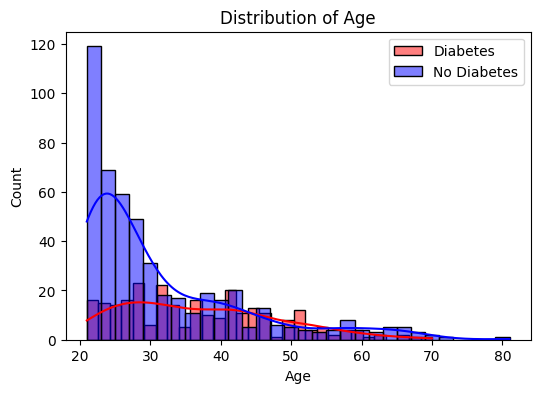

In [16]:
# Distribution of each feature with respect to the target variable
for column in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(6, 4))
    sns.histplot(df[df['Outcome'] == 1][column], kde=True, color='red', label='Diabetes', bins=30)
    sns.histplot(df[df['Outcome'] == 0][column], kde=True, color='blue', label='No Diabetes', bins=30)
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

## Data preprocessing for Model Training

In [17]:
X = df.drop(columns = ['Outcome']) # feature variable
Y = df['Outcome'] # target variable

In [19]:
# Split the data into train and test sets (80 - 20 ratio split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [20]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Evaluation

1. Logistic Regression

In [21]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
y_pred_log_reg = log_reg.predict(X_test)

In [23]:
# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7532467532467533

Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



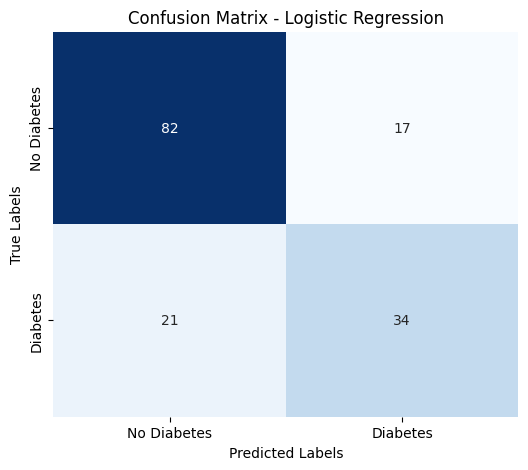

In [24]:
cm_log_reg = confusion_matrix(Y_test, y_pred_log_reg)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')

plt.show()

2. Random Forest Classifier

In [25]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred_rf = rf_clf.predict(X_test)

In [27]:
# Evaluate the model
print("\nRandom Forest Classifier Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.7532467532467533

Confusion Matrix:
 [[80 19]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



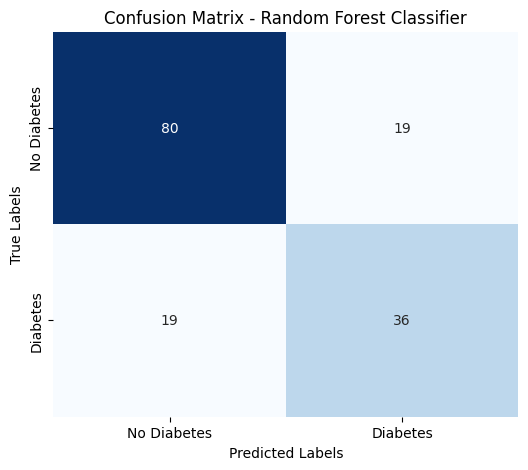

In [28]:
cm_rf_clf = confusion_matrix(Y_test, y_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_clf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')

plt.show()

3. Support Vector Classifier (SVC)

In [29]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [30]:
y_pred_svc = svc.predict(X_test)

In [31]:
# Evaluate the model
print("\nSVC Accuracy:", accuracy_score(Y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_svc))


SVC Accuracy: 0.7532467532467533

Confusion Matrix:
 [[84 15]
 [23 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



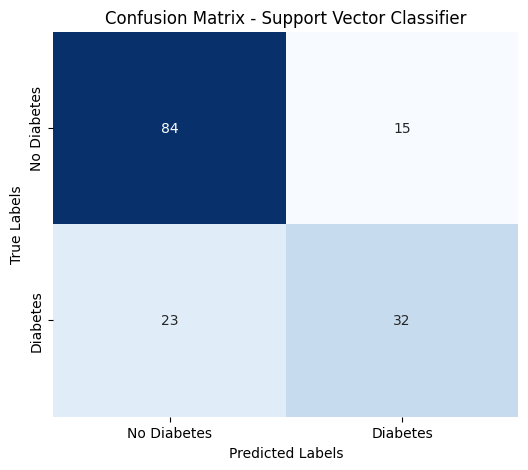

In [32]:
cm_svc = confusion_matrix(Y_test, y_pred_svc)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Classifier')

plt.show()

4. Decision Tree Classifier

In [33]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred_dt = dt_clf.predict(X_test)

In [35]:
# Evaluate the model
print("\nDecision Tree Accuracy:", accuracy_score(Y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_dt))


Decision Tree Accuracy: 0.7207792207792207

Confusion Matrix:
 [[77 22]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



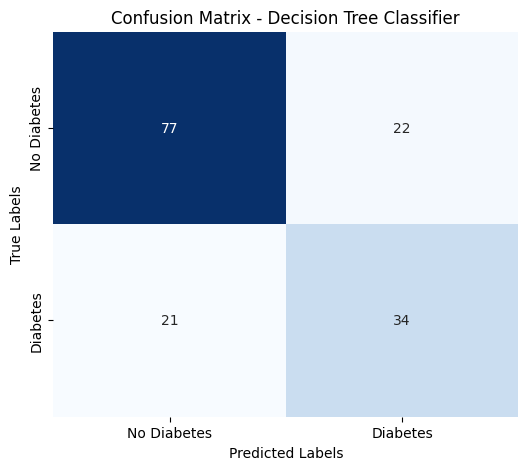

In [36]:
cm_dt = confusion_matrix(Y_test, y_pred_dt)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')

plt.show()

5. K Nearest Neighbours (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Hypeparameter tuning to find the best 'k'
param_grid = {
    'n_neighbors': range(1, 21),  
    'weights': ['uniform', 'distance'],  
    'metric': ['minkowski', 'euclidean', 'manhattan']  
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")

best_knn = grid_search.best_estimator_

Best Parameters from GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


In [43]:
y_pred_knn = best_knn.predict(X_test)

In [44]:
# Evaluate the model
print("KNN Accuracy:", accuracy_score(Y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_knn))

KNN Accuracy: 0.7662337662337663

Confusion Matrix:
 [[82 17]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



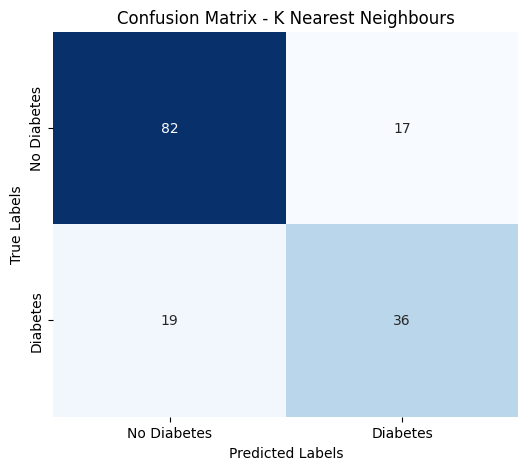

In [45]:
cm_knn = confusion_matrix(Y_test, y_pred_knn)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K Nearest Neighbours')

plt.show()

## Model Evaluation and Comparision

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

model_results = {}

# Logistic Regression
log_reg_accuracy = accuracy_score(Y_test, y_pred_log_reg)
log_reg_f1 = f1_score(Y_test, y_pred_log_reg)
log_reg_cv = cross_val_score(log_reg, X, Y, cv=5, scoring='accuracy').mean()

model_results['Logistic Regression'] = {
    'Accuracy': log_reg_accuracy,
    'F1-Score': log_reg_f1,
    'Cross-validation Accuracy': log_reg_cv
}

# Random Forest Classifier
rf_clf_accuracy = accuracy_score(Y_test, y_pred_rf)
rf_clf_f1 = f1_score(Y_test, y_pred_rf)
rf_clf_cv = cross_val_score(rf_clf, X, Y, cv=5, scoring='accuracy').mean()

model_results['Random Forest Classifier'] = {
    'Accuracy': rf_clf_accuracy,
    'F1-Score': rf_clf_f1,
    'Cross-validation Accuracy': rf_clf_cv
}

# Support Vector Classifier (SVC)
svc_accuracy = accuracy_score(Y_test, y_pred_svc)
svc_f1 = f1_score(Y_test, y_pred_svc)
svc_cv = cross_val_score(svc, X, Y, cv=5, scoring='accuracy').mean()

model_results['SVC'] = {
    'Accuracy': svc_accuracy,
    'F1-Score': svc_f1,
    'Cross-validation Accuracy': svc_cv
}

# Decision Tree Classifier
dt_clf_accuracy = accuracy_score(Y_test, y_pred_dt)
dt_clf_f1 = f1_score(Y_test, y_pred_dt)
dt_clf_cv = cross_val_score(dt_clf, X, Y, cv=5, scoring='accuracy').mean()

model_results['Decision Tree Classifier'] = {
    'Accuracy': dt_clf_accuracy,
    'F1-Score': dt_clf_f1,
    'Cross-validation Accuracy': dt_clf_cv
}

# K Nearest Neighbours
knn_accuracy = accuracy_score(Y_test, y_pred_knn)
knn_f1 = f1_score(Y_test, y_pred_knn)
knn_cv = cross_val_score(knn, X, Y, cv=5, scoring='accuracy').mean()

model_results['K Nearest Neighbours'] = {
    'Accuracy': knn_accuracy,
    'F1-Score': knn_f1,
    'Cross-validation Accuracy': knn_cv
}

for model_name, metrics in model_results.items():
    print(f"--- {model_name} ---")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print(f"Cross-validation Accuracy: {metrics['Cross-validation Accuracy']:.4f}")
    print("\n")

# Compare models and find the best performing model
best_model = max(model_results, key=lambda x: model_results[x]['Accuracy'])
best_model_accuracy = model_results[best_model]['Accuracy']
best_model_f1 = model_results[best_model]['F1-Score']
best_model_cv = model_results[best_model]['Cross-validation Accuracy']

# Best performing model results
print("\nBest Model Based on Accuracy and Overall Performance for this dataset:")
print(f"The best model is {best_model} with an accuracy of {best_model_accuracy:.4f}")
print(f"F1-Score: {best_model_f1:.4f}")
print(f"Cross-validation Accuracy: {best_model_cv:.4f}")


--- Logistic Regression ---
Accuracy: 0.7532
F1-Score: 0.6415
Cross-validation Accuracy: 0.7709


--- Random Forest Classifier ---
Accuracy: 0.7532
F1-Score: 0.6545
Cross-validation Accuracy: 0.7592


--- SVC ---
Accuracy: 0.7532
F1-Score: 0.6275
Cross-validation Accuracy: 0.7605


--- Decision Tree Classifier ---
Accuracy: 0.7208
F1-Score: 0.6126
Cross-validation Accuracy: 0.6955


--- K Nearest Neighbours ---
Accuracy: 0.7662
F1-Score: 0.6667
Cross-validation Accuracy: 0.7136



Best Model Based on Accuracy and Overall Performance for this dataset:
The best model is K Nearest Neighbours with an accuracy of 0.7662
F1-Score: 0.6667
Cross-validation Accuracy: 0.7136


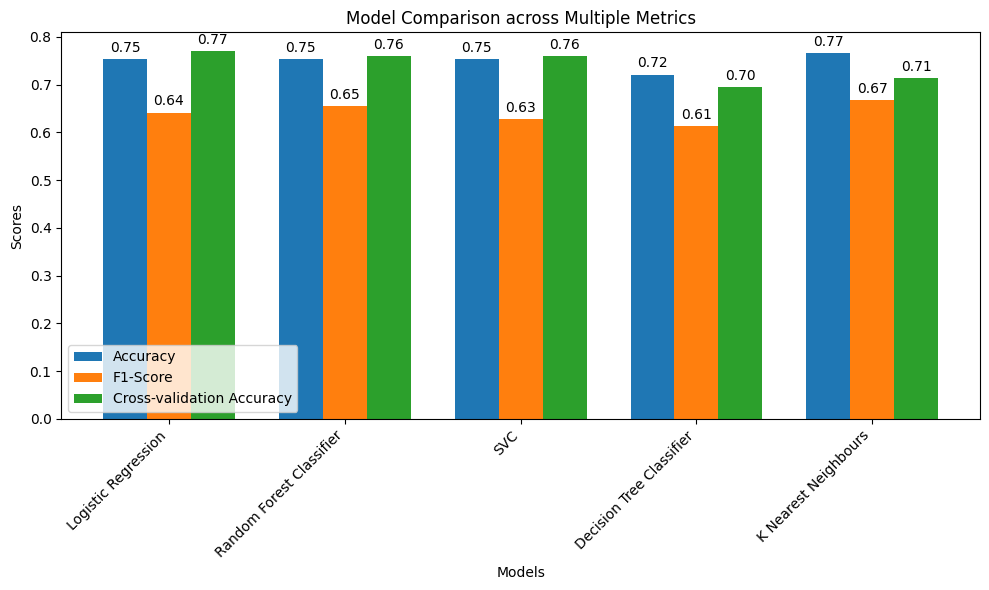

In [47]:
metrics = ['Accuracy', 'F1-Score', 'Cross-validation Accuracy']
model_names = list(model_results.keys())

accuracy_values = [metrics['Accuracy'] for metrics in model_results.values()]
f1_values = [metrics['F1-Score'] for metrics in model_results.values()]
cv_values = [metrics['Cross-validation Accuracy'] for metrics in model_results.values()]

# Set up the positions for the bars
x = np.arange(len(model_names))  
width = 0.25  

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x, f1_values, width, label='F1-Score')
rects3 = ax.bar(x + width, cv_values, width, label='Cross-validation Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison across Multiple Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()

plt.show()